# Semana 8: Detección de caras con PCA

En esta asignación se implementa la detección de caras mediante PCA.

1. Se importan las dependencias necesarias y algunas funciones auxiliares.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Escribe texto sobre la imagen


def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)


2. Se cargan las etiquetas de clasificación.

In [2]:
# Lista de personas
subjects = ["", "Brandon", "Kevin", "Miguel", "Rodolfo", "Randald"]

3. Se crea el método de detección facial.

In [3]:
# función de detección de cara.
def detect_face(img):
    # convierte la imagen a escala de grises.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Carga un detector de caras LBP.
    face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

    # obtiene la lista de caras.
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.2, minNeighbors=5)

    if (len(faces) == 0):
        return None, None

    # Extrae el área de la cara.
    (x, y, w, h) = faces[0]

    # Retorna la parte de la cara de la imagen
    return gray[y:y+w, x:x+h], faces[0]

4. Función de preparación para los datos de entrenamiento.

In [4]:
# Entrenamiento a partir de las caras.
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []

    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue

        label = int(dir_name.replace("s", ""))

        subject_dir_path = data_folder_path + "/" + dir_name

        subject_images_names = os.listdir(subject_dir_path)

        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue

            image_path = subject_dir_path + "/" + image_name

            image = cv2.imread(image_path)

            # detect face
            face, rect = detect_face(image)

            if face is not None:
                # add face to list of faces
                faces.append(face)
                # add label for this face
                labels.append(label)

    return faces, labels

5. Se implementa método de predicción.

In [5]:
def predict(test_img):
    # realiza una copia de la imagen original.
    img = test_img.copy()
    # detecta la cara y el rectángulo en la imagen de origen.
    face, rect = detect_face(img)

    # etiqueta un resultado asociado a una persona y también la confianza.
    label, confidence = face_recognizer.predict(face)

    # etiqueta.
    label_text = subjects[label]

    # dibuja un rectángulo sobre la imagen.
    draw_rectangle(img, rect)
    # escribe el nombre del sujeto.
    draw_text(img, label_text, rect[0], rect[1]-5)

    return img

6. Se realiza el entrenamiento del modelo.

In [6]:
faces, labels = prepare_training_data("training-data")

print("Caras totales: ", len(faces))
print("Etiquetas totales: ", len(labels))

# Crea un detector de caras.
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

# Entrena el detector de caras.
face_recognizer.train(faces, np.array(labels))

Caras totales:  17
Etiquetas totales:  17


7. Se realiza la predicción con imágenes de prueba.

In [7]:
# Carga las imágenes de prueba.
test_img1 = cv2.imread("test-data/test1.jpg")
test_img2 = cv2.imread("test-data/test2.jpg")
test_img3 = cv2.imread("test-data/test3.jpg")
test_img4 = cv2.imread("test-data/test4.jpg")
test_img5 = cv2.imread("test-data/test5.jpg")

# Ejecuta las predicciones
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
predicted_img3 = predict(test_img3)
predicted_img4 = predict(test_img4)
predicted_img5 = predict(test_img5)

8. Se muestran las imágenes.

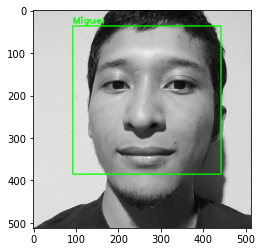

In [8]:
#plt.imshow(predicted_img1)
#plt.imshow(predicted_img2, cmap='gray')
plt.imshow(predicted_img3, cmap='gray')
#plt.imshow(predicted_img4, cmap='gray')
#plt.imshow(predicted_img5, cmap='gray')